In [3]:
# Step 1: Select Dataset and Define the Problem
# Dataset: We'll explore the structure and key characteristics of the uploaded Crop_Recommendation.csv file.
#Problem Definition:
#Develop a predictive machine learning model to recommend the most suitable crop based on environmental and soil factors.
#Research Questions:
#Can we accurately predict the most suitable crop using soil and weather features?
#What are the most important features in determining crop suitability?


import pandas as pd
# Display basic information and a preview of the dataset
data =data = pd.read_csv( 'D:\/Crop_recommendation.csv')
data_info = data.info()
data_preview = data.head()

data_info, data_preview

# Define a function to assign a season based on temperature and rainfall
def assign_season(row):
    if row['Temperature'] < 20 and row['Rainfall'] < 100:
        return 'Winter'
    elif row['Temperature'] > 30 and row['Rainfall'] < 100:
        return 'Summer'
    elif row['Rainfall'] >= 100:
        return 'Monsoon'
    else:
        return 'Spring'

# Apply the function to create the 'Season' column
data['Season'] = data.apply(assign_season, axis=1)

# Preview the dataset with the new 'Season' variable
data[['Temperature', 'Rainfall', 'Season']].head()

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


KeyError: 'Temperature'

In [4]:
import matplotlib.pyplot as plt

# Step 2: Data Exploration

# Descriptive statistics for numerical features
data_stats = data.describe()

# Distribution of the target variable (Crop)
crop_distribution = data['Crop'].value_counts()

# Visualize the target variable distribution
plt.figure(figsize=(12, 6))
crop_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crops in the Dataset')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display descriptive statistics and crop distribution insights
data_stats, crop_distribution






KeyError: 'Crop'

In [17]:

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Normalize and scale numerical features
scaler = MinMaxScaler()
numerical_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 3. Encode categorical features (Crop and Season)
label_encoder_crop = LabelEncoder()
label_encoder_season = LabelEncoder()

data['Crop'] = label_encoder_crop.fit_transform(data['Crop'])
data['Season'] = label_encoder_season.fit_transform(data['Season'])

# 4. Re-check for potential outliers by describing the scaled data
scaled_data_stats = data.describe()

# Output the results
missing_values, scaled_data_stats.head(), data.head()



#step3
import numpy as np

# Detect potential outliers using the interquartile range (IQR) method
outlier_info = {}

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count potential outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_info[feature] = len(outliers)

# Remove outliers (optional step; can affect training results)
cleaned_data = data.copy()
for feature in numerical_features:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]

# Summary of outliers detected and dataset size after removal
outlier_info, cleaned_data.shape


# Re-apply outlier removal for finalized preprocessing
final_data = data.copy()
for feature in numerical_features:
    Q1 = final_data[feature].quantile(0.25)
    Q3 = final_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    final_data = final_data[(final_data[feature] >= lower_bound) & (final_data[feature] <= upper_bound)]

# Confirm final dataset shape and key statistics after preprocessing
final_data_stats = final_data.describe()
final_data_shape = final_data.shape

final_data_stats, final_data_shape


(          Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
 count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
 mean      0.387216     0.286867     0.138730     0.484522     0.647574   
 std       0.270919     0.160759     0.083073     0.119229     0.264213   
 min       0.000000     0.000000     0.000000     0.186651     0.000000   
 25%       0.157143     0.142857     0.075000     0.414399     0.507338   
 50%       0.285714     0.292857     0.115000     0.488208     0.735774   
 75%       0.635714     0.414286     0.200000     0.565088     0.863595   
 max       1.000000     0.642857     0.400000     0.801301     1.000000   
 
           pH_Value     Rainfall         Crop       Season  
 count  1846.000000  1846.000000  1846.000000  1846.000000  
 mean      0.464766     0.291947    10.851029     0.769772  
 std       0.105794     0.188370     6.130736     0.865212  
 min       0.170879     0.000000     1.000000     0.000000  
 25%       0.39325

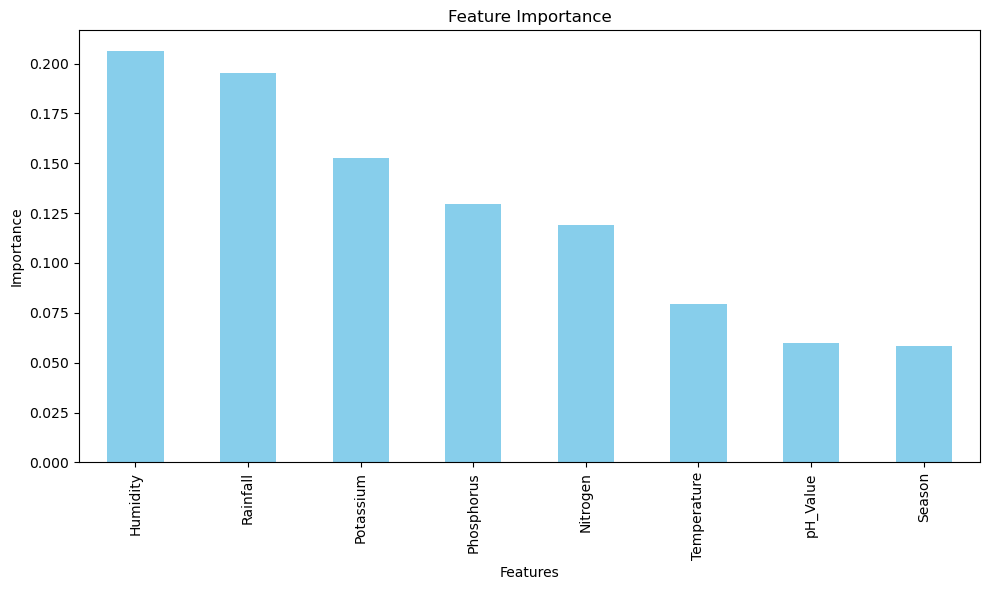

Humidity       0.206314
Rainfall       0.195262
Potassium      0.152557
Phosphorus     0.129434
Nitrogen       0.119174
Temperature    0.079291
pH_Value       0.059687
Season         0.058281
dtype: float64

In [18]:
#step 4
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target
X = final_data.drop('Crop', axis=1)  # Features (including Season)
y = final_data['Crop']  # Target

# Train a Random Forest model to calculate feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Calculate feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Display top features
feature_importance





In [53]:
#step 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a simple Decision Tree as the baseline model
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)

# Dynamically match labels from the test set
unique_classes_test = sorted(y_test.unique())  # Get unique class labels in the test set
correct_target_names = label_encoder_crop.inverse_transform(unique_classes_test)  # Map them back to their names

# Generate the classification report
baseline_report_fixed = classification_report(
    y_test, y_pred, target_names=correct_target_names
)

# Output the results
baseline_accuracy, baseline_report_fixed


TypeError: object of type 'numpy.int64' has no len()

Baseline Accuracy: 0.98
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           8       0.89      0.80      0.84        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        12
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        16
          17       1.00      0.85      0.92        13
          18       1.00      1.00      1.00        19
   

In [31]:
#step 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a simple Decision Tree as the baseline model
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)

# Dynamically match labels from the test set
unique_classes_test = sorted(y_test.unique())  # Get unique class labels in the test set
correct_target_names = label_encoder_crop.inverse_transform(unique_classes_test)  # Map them back to their names

# Generate the classification report
baseline_report_fixed = classification_report(
    y_test, y_pred, target_names=correct_target_names
)

# Output the results
baseline_accuracy, baseline_report_fixed


TypeError: object of type 'numpy.int64' has no len()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a simple Decision Tree as the baseline model
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred)

# Ensure that classes are sorted and dynamically extracted
unique_classes_test = sorted(y_test.unique())  # Ensure order of classes in test set
correct_target_names = [str(label) for label in label_encoder_crop.inverse_transform(unique_classes_test)]  # Convert to string

# Generate the classification report
baseline_report_fixed = classification_report(
    y_test, y_pred, labels=unique_classes_test, target_names=correct_target_names
)

# Display the results
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(baseline_report_fixed)


Baseline Accuracy: 0.98
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           8       0.89      0.80      0.84        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        12
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        16
          17       1.00      0.85      0.92        13
          18       1.00      1.00      1.00        19
   

In [34]:
#step 6
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models and their results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42)
}

# Train and evaluate each model
model_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Ensure that classes in y_test are dynamically matched
    unique_classes_test = sorted(y_test.unique())  # Get unique classes in y_test
    correct_target_names = [str(label) for label in label_encoder_crop.inverse_transform(unique_classes_test)]  # Map them to names
    
    # Generate the classification report
    classification_rep = classification_report(
        y_test, 
        y_pred, 
        labels=unique_classes_test,  # Use unique classes in y_test
        target_names=correct_target_names  # Dynamically match the target names
    )
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep
    }
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_rep)
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.88
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.80      0.80      0.80        20
           3       1.00      0.89      0.94        18
           4       0.95      1.00      0.98        20
           5       0.83      1.00      0.91        20
           6       0.95      1.00      0.98        20
           8       0.73      0.95      0.83        20
           9       0.86      0.95      0.90        20
          10       0.67      1.00      0.80        20
          11       1.00      0.80      0.89        20
          12       0.95      0.95      0.95        19
          13       1.00      0.25      0.40        12
          14       0.83      1.00      0.91        20
          15       0.91      1.00      0.95        20
          16       1.00      0.62      0.77        16
          17       1.00      0.46      0.63        13
          18       0.90      0.95      

In [35]:
#step7
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, None]}
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    }
}

# Perform hyperparameter tuning
best_models = {}
for model_name, config in param_grids.items():
    print(f"Hyperparameter tuning for: {model_name}")
    grid_search = GridSearchCV(config["model"], config["params"], scoring='accuracy', cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store best model and results
    best_models[model_name] = {
        "Best Estimator": grid_search.best_estimator_,
        "Best Parameters": grid_search.best_params_,
        "Best Cross-Validation Accuracy": grid_search.best_score_
    }
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-Validation Accuracy for {model_name}: {grid_search.best_score_}\n")

# Evaluate the best models on the test set
print("Evaluating best models on the test set...\n")
for model_name, model_info in best_models.items():
    best_model = model_info["Best Estimator"]
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Test Set Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)


Hyperparameter tuning for: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Cross-Validation Accuracy for Logistic Regression: 0.9654443426477325

Hyperparameter tuning for: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Cross-Validation Accuracy for KNN: 0.9742510306917087

Hyperparameter tuning for: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Cross-Validation Accuracy for Decision Tree: 0.9850939074667888

Hyperparameter tuning for: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Cross-Validation Accuracy for Random Forest: 0.9925538250114521

Hyperparameter tuning for: SVM
Fitting 5 folds for eac

Unique classes in y_test: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
Unique classes in y_pred: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
Classes from label encoder: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        19
          13      

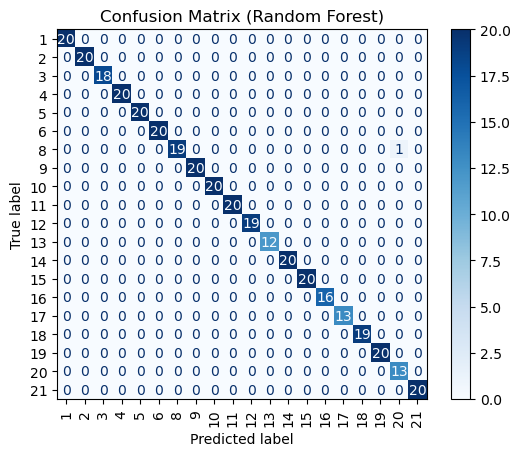

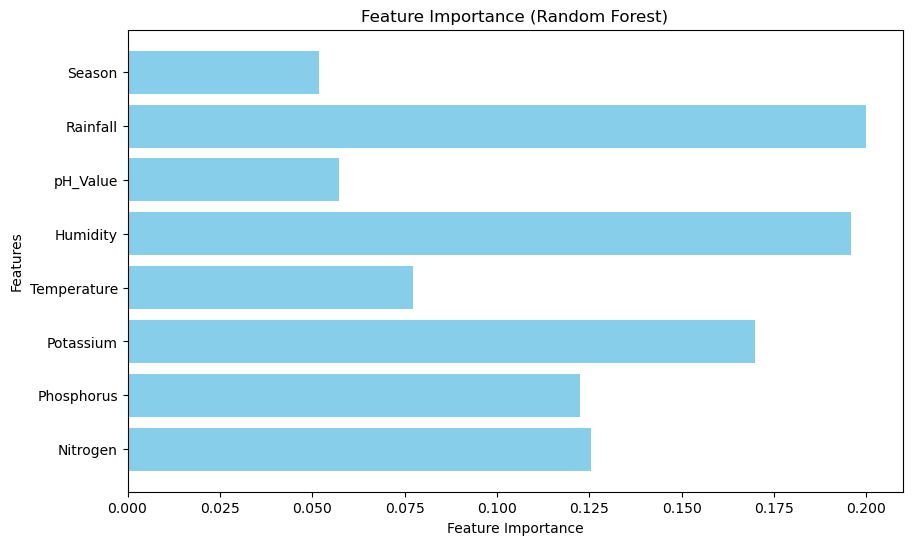

In [50]:
# Select best model (s) and evaluate them. 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Best model (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print unique classes for debugging
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))
print("Classes from label encoder:", label_encoder_crop.classes_)

# Ensure the classes are consistent with y_test
unique_classes = sorted(set(y_test))  # Unique classes in y_test

# Print classification report using unique_classes
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred, labels=unique_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Feature importance (only for tree-based models like Random Forest)
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

Unique classes in y_test: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
Unique classes in y_pred: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
Classes from label encoder: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        22
          17       1.00      1.00      1.00        14
          18       1.00      1.00      1.00        27
          19       1.00      1.00      1.00        20
           2      

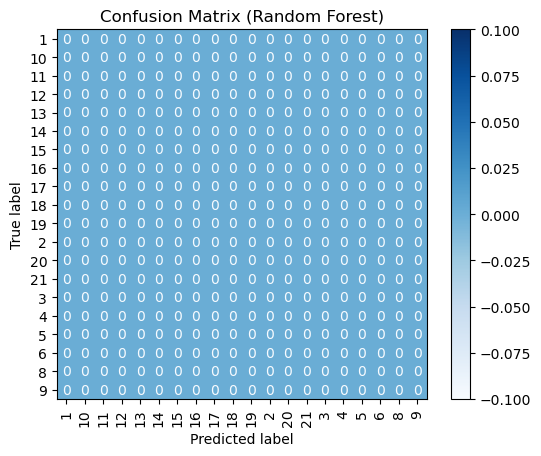

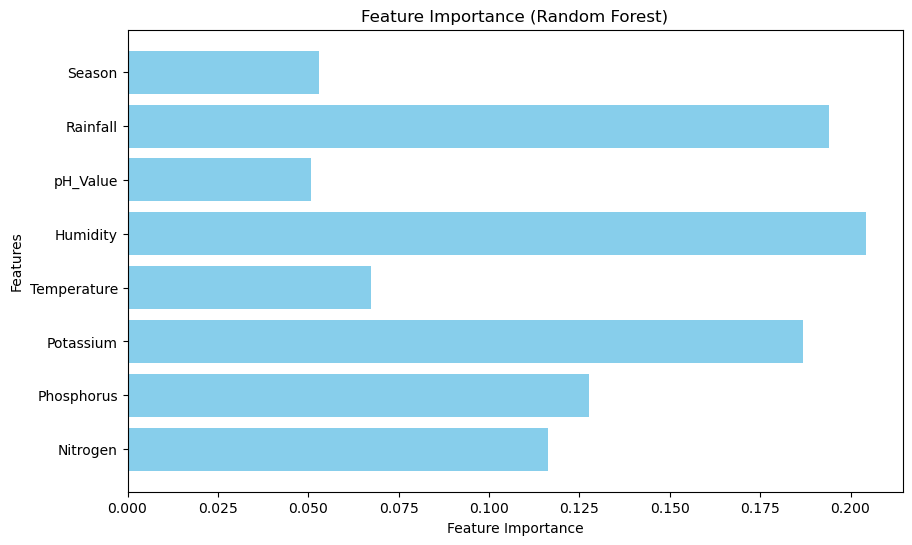

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Best model (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_model.fit(X_resampled, y_resampled)
y_pred = best_model.predict(X_test)

# Print unique classes for debugging
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))
print("Classes from label encoder:", label_encoder_crop.classes_)

# Ensure the classes are consistent with y_test
unique_classes = sorted(set(map(str, y_test)))  # Convert to string

# Print classification report using unique_classes
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred, labels=unique_classes, target_names=unique_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Feature importance (only for tree-based models like Random Forest)
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()